<h1>decision tree</h1>

In [7]:
import numpy as np
import pandas as pd

In [8]:
dataset=pd.read_csv('AllElectronic.csv')

In [4]:
print(dataset)

       age  income student credit_rating buys_computer  Unnamed: 5
0    Youth    high      no          fair            no         NaN
1    Youth    high      no     excellent            no         NaN
2   middle    high      no          fair           yes         NaN
3   senior  medium      no          fair           yes         NaN
4   senior     low     yes          fair           yes         NaN
5   senior     low     yes     excellent            no         NaN
6   middle     low     yes     excellent           yes         NaN
7    Youth  medium      no          fair            no         NaN
8    Youth     low     yes          fair           yes         NaN
9   senior  medium     yes          fair           yes         NaN
10   Youth  medium     yes     excellent           yes         NaN
11  middle  medium      no     excellent           yes         NaN
12  middle    high     yes          fair           yes         NaN
13  senior  medium      no     excellent            no        

In [9]:
dataset.dropna(axis='columns')

,age,income,student,credit_rating,buys_computer
0,Youth,high,no,fair,no
1,Youth,high,no,excellent,no
2,middle,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle,low,yes,excellent,yes
7,Youth,medium,no,fair,no
8,Youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [10]:
feature_col1=['youth','youth','middle','senior','senior','senior','middle','youth','youth','senior','youth','middle','middle','senior','middle','senior','middle','youth','youth','youth','senior','senior','youth','middle','youth','senior','senior','middle']

In [11]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
feature_encoded1=le.fit_transform(feature_col1)
print(feature_encoded1)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1 0 1 0 2 2 2 1 1 2 0 2 1 1 0]


In [12]:
feature_col2=['high','high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium','high','medium','low','medium','high','high','low','low','low','high','medium','medium','medium','medium']

In [13]:
feature_encoded2=le.fit_transform(feature_col2)
print(feature_encoded2)

[0 0 0 2 1 1 1 2 1 2 2 2 0 2 0 2 1 2 0 0 1 1 1 0 2 2 2 2]


In [14]:
feature_col3=['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no','yes','no','yes','no','no','no','yes','yes','yes','no','yes','yes','no','no']

In [16]:
feature_encoded3=le.fit_transform(feature_col3)
print(feature_encoded3)

[0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0]


In [17]:
feature_col4=['fair','excellent','fair','fair','fair','excellent','excellent','fair','fair','fair','excellent','excellent','fair','excellent','fair','excellent','excellent','fair','fair','excellent','fair','excellent','fair','fair','excellent','fair','fair','excellent']

In [18]:
feature_encoded4=le.fit_transform(feature_col4)
print(feature_encoded4)

[1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0]


In [19]:
label_col=['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no','yes','no','yes','no','no','no','yes','no','yes','yes','yes','yes','yes','yes']
label_encoded=le.fit_transform(label_col)
print(label_encoded)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1]


In [20]:
#combinig  into single listof tuples
features=list(zip(feature_encoded1,feature_encoded2,feature_encoded3,feature_encoded4))

In [21]:
X=features
y=label_encoded

In [22]:
from sklearn.metrics import confusion_matrix
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier()


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7777777777777778


In [26]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


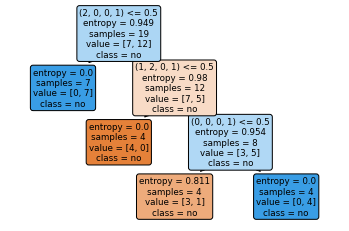

In [26]:
import matplotlib.pyplot as plt
from sklearn import tree


tree.plot_tree(clf, 
          feature_names = features, 
          class_names = label_col, 
          filled = True, 
          rounded = True)

plt.savefig('tree_visualization.png') 

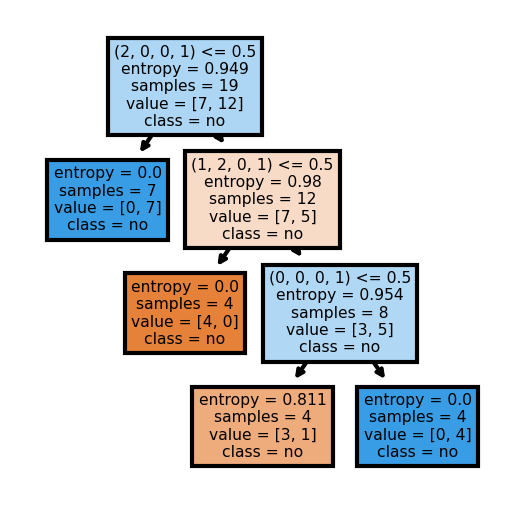

In [25]:
import matplotlib.pyplot as plt
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)

tree.plot_tree(clf,
           feature_names = features,
           class_names=label_col,
           filled = True);

fig.savefig('imagename.png')

In [28]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1



<h1>NAIVE BAYES</h1>

In [37]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label_encoded)

#Predict Output
predicted= model.predict([[1,0,0,1]]) # 1:senior, 0:income=high,0:student=no,1:credit_rating=fair
print ("buys_computer:", predicted)
#Query 1:
#query = np.array([['senior','high', 'no', 'fair']])
#print("Query 1:- {} ---> {}".format(query, model.predict(query)))


buys_computer: [0]


<h1>linear regression</h1>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([72,50,81,74,94,86,59,83,65,33,88,81]).reshape((-1, 1))
y = np.array([84,63,77,78,90,75,49,79,77,52,74,90])

sumx=0
sumy=0
sumxy=0
sumx2=0
n=12
for i in range(n):
    sumx=sumx+x[i]
    sumx2=sumx2+x[i]*x[i]
    sumy=sumy+y[i]
    sumxy=sumxy+x[i]*y[i]
b=(n*sumxy-sumx*sumy)/(n*sumx2-sumx*sumx)
a=(sumy-b*sumx)/n
print(b)
print(a)
x=86
y=a+b*x
print(y)

[0.58160008]
[32.02786108]
[82.04546774]


<h1>hierarchical clustering</h1>

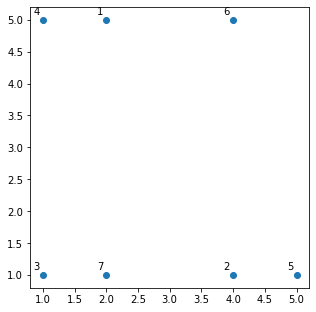

In [2]:
import numpy as np

X = np.array([[2,5],
              [4,1],
              [1,1],
              [1,5],
              [5,1],
              [4,5],
              [2,1]])
import matplotlib.pyplot as plt

labels = range(1, 8)
plt.figure(figsize=(5, 5))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

In [3]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(X)

array([1, 0, 0, 1, 0, 1, 0], dtype=int64)

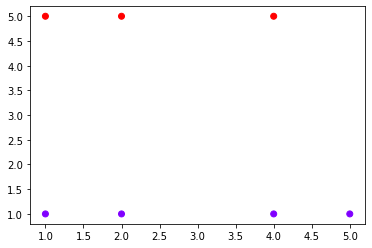

In [4]:
plt.scatter(X[:,0],X[:,1], c = cluster.labels_, cmap = 'rainbow')

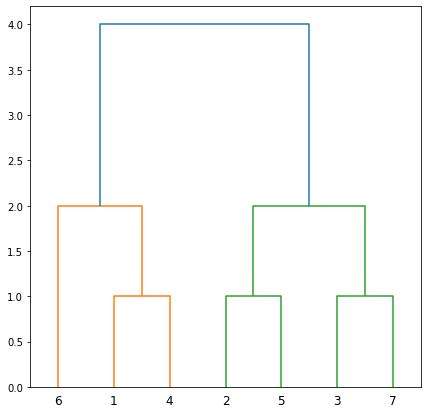

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 8)

plt.figure(figsize=(7, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

<h1>SVM</h1>

In [2]:
import numpy as np
X = np.array([[3, 1], [3, -1], [6, 1], [6, -1],[1,0],[0,1],[0,-1],[-1,0]])
y = np.array([1, 1, 1, 1,-1,-1,-1,-1])#
#class1=positive=1
#class2=negative=-1
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)
prediction = clf.predict([[2,1]])
print(prediction)

[-1]


In [10]:
if prediction == 1:
        print("positive")
elif prediction == -1:
        print("negative")

positive


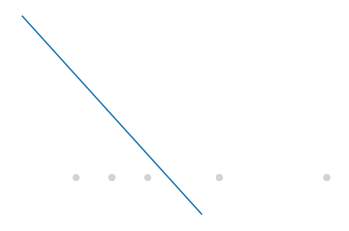

[1]


In [6]:
# Load libraries
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
X = np.array([[3, 1], [3, -1], [6, 1], [6, -1],[1,0],[0,1],[0,-1],[-1,0]])
y = np.array([1, 1, 1, 1,-1,-1,-1,-1])#
# Create support vector classifier
svc = LinearSVC(C=1.0)

# Train model
model = svc.fit(X, y)
# Plot data points and color using their class
color = ['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(X[:,0], X[:,1], c=color)

# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();
prediction = model.predict([[2,1]])
print(prediction)


No handles with labels found to put in legend.


[-1]


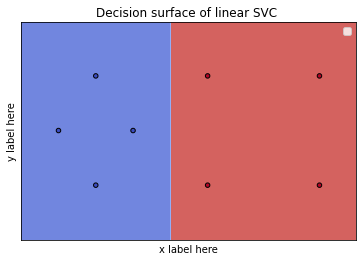

In [8]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
X = np.array([[3, 1], [3, -1], [6, 1], [6, -1],[1,0],[0,1],[0,-1],[-1,0]])
y = np.array([1, 1, 1, 1,-1,-1,-1,-1])#


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(X, y)
prediction = model.predict([[2,1]])
print(prediction)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

[-1]
[-1]
[-1]
[-1]


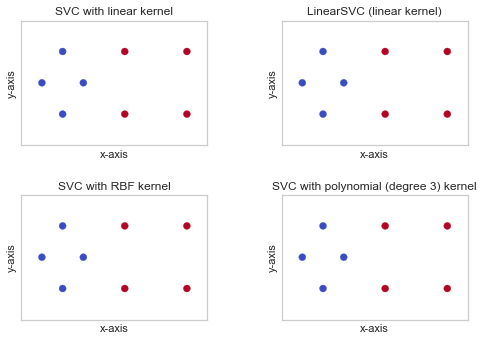

In [15]:
#print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
X = np.array([[3, 1], [3, -1], [6, 1], [6, -1],[1,0],[0,1],[0,-1],[-1,0]])
y = np.array([1, 1, 1, 1,-1,-1,-1,-1])#

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    prediction = svc.predict([[2,1]])
    print(prediction)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

C:\Users\Laptop House\anaconda\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


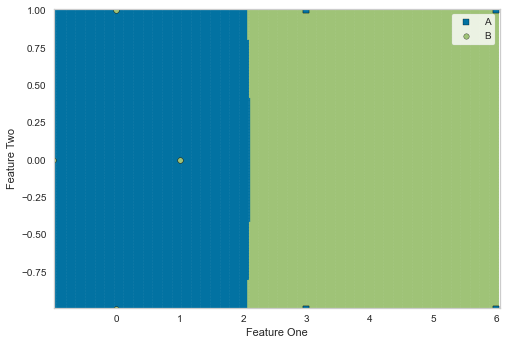

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.contrib.classifier import DecisionViz
import numpy as np
# import some data to play with
X = np.array([[3, 1], [3, -1], [6, 1], [6, -1],[1,0],[0,1],[0,-1],[-1,0]])
y = np.array([1, 1, 1, 1,-1,-1,-1,-1])#

viz = DecisionViz(
    SVC(kernel="rbf", C=0.025), title="Linear SVM",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
viz.fit(X, y)
viz.draw(X, y)
viz.show()

[-1]


TypeError: Input z must be 2D, not 1D

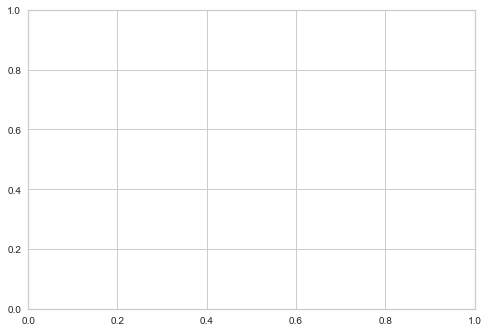

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
# import some data to play with
# import some data to play with
X = np.array([[3, 1], [3, -1], [6, 1], [6, -1],[1,0],[0,1],[0,-1],[-1,0]])
y = np.array([1, 1, 1, 1,-1,-1,-1,-1])#

C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=1).fit(X, y)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
prediction = svc.predict([[2,1]])
print(prediction)


plt.contourf(xx, yy, prediction, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

<h1>INFORMATION GAIN</h1>

In [ ]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
dataset=pd.read_csv('info.csv')

In [4]:
print(dataset)

   d1  d2  d3  d4 label
0  A1  B1  C1  D1    E1
1  A1  B1  C1  D2    E1
2  A1  B2  C1  D1    E1
3  A1  B3  C2  D1    E2
4  A2  B1  C1  D1    E1
5  A2  B3  C2  D2    E1
6  A4  B2  C1  D1    E2
7  A4  B3  C2  D1    E2
8  A4  B3  C2  D2    E1
9  A4  B2  C2  D1    E2


In [5]:
from math import log2
# proportion of examples in each class
classE1 = 60/100
classE2 = 40/100
# calculate entropy
InfoD = -(classE1 * log2(classE1) + classE2 * log2(classE2))
# print the result
print('entropy: %.3f bits' % InfoD)

entropy: 0.971 bits


In [6]:
categoryA1=4/10
categoryA2=2/10
categoryA4=4/10
E1A1=3/4
E2A1=1/4
E1A2=2/2
E1A4=1/4
E2A4=3/4

In [7]:
Infod1=categoryA1*(-E1A1*log2(E1A1)-E2A1*log2(E2A1))+categoryA2*(-E1A2*log2(E1A2))+categoryA4*(-E1A4*log2(E1A4)-E2A4*log2(E2A4))
print(Infod1)

0.6490224995673063


In [8]:
gaind1=InfoD-Infod1
print(gaind1)

0.3219280948873623


<h1>NEURAL NETWORK</h1>

In [9]:
#given data
#input
import math
x1 = 1
x2 = -1
x3 = 1
x4=1
x5=-1
w1 =- 0.5
w2 = 0.7
w3 = -0.2
w4 = 0.1
w5 = 0.9

th1 = 1
th2 = -1

learn_rate = 0.1


In [10]:
s=(x1*w1)+(x2*w2)+(x3*w3)+(x4*w4)+(x5*w5)
print(s)

-2.1999999999999997


In [11]:
delta1=learn_rate*(th1-th2)*x1
print(delta1)

0.2


In [12]:
delta2=learn_rate*(th1-th2)*x2
print(delta2)

-0.2


In [13]:
delta3=learn_rate*(th1-th2)*x3
print(delta3)

0.2


In [14]:
delta4=learn_rate*(th1-th2)*x4
print(delta4)

0.2


In [15]:
delta5=learn_rate*(th1-th2)*x5
print(delta5)

-0.2


In [16]:
updatew1=w1+delta1
print(updatew1)

-0.3


In [17]:
updatew2=w2+delta2
print(updatew2)

0.49999999999999994


In [18]:
updatew3=w3+delta3
print(updatew3)

0.0


In [19]:
updatew4=w4+delta4
print(updatew4)

0.30000000000000004


In [20]:
updatew5=w5+delta5
print(updatew5)

0.7


In [21]:
newmodelweight=updatew1*x1+updatew2*x2+updatew3*x3+updatew4*x4+updatew5*x5
print(newmodelweight)

-1.1999999999999997


<h1>APRIORI</h1>

In [33]:
from numpy import *
import pandas as pd

In [34]:

DF=pd.read_csv('apri.csv')
DF

,1,2,3,4,5,6
0,M,O,N,K,E,Y
1,D,O,N,K,E,Y
2,M,A,K,E,NAN,NAN
3,M,U,C,K,Y,NAN


In [24]:
#A=1
#C=2
#D=3
#E=4
#K=5
#M=6
#N=7
#O=8
#U=9
#Y=10


In [35]:
def loadDataSet():
    
     #return [[6,8,7,5,4,10], [3,8,7,5,4,10], [6,1,5,4], [ 6,9,2,5,10]]
    return [['M','O','N','K','E','Y'],['D','O','N','K','E','Y'],['M','A','K','E'],['M','U','C','K','Y']]

In [36]:
def createC1(dataSet):
    C1 = []
    for transaction in dataSet:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])
                
    C1.sort()
    return list(map(frozenset, C1)) #use frozen set so we
                                    #can use it as a key in a dict  

In [37]:
def scanD(D, Ck, minSupport):
    ssCnt = {}
    for tid in D:
        for can in Ck:
            if can.issubset(tid):
                if not can in ssCnt: ssCnt[can]=1
                else: ssCnt[can] += 1
    numItems = float(len(D))
    retList = []
    supportData = {}
    for key in ssCnt:
        support = ssCnt[key]/numItems
        if support >= minSupport:
            retList.insert(0,key)
        supportData[key] = support
    return retList, supportData

In [38]:
dataSet = loadDataSet()
dataSet

[['M', 'O', 'N', 'K', 'E', 'Y'],
 ['D', 'O', 'N', 'K', 'E', 'Y'],
 ['M', 'A', 'K', 'E'],
 ['M', 'U', 'C', 'K', 'Y']]

In [8]:
C1 = createC1(dataSet)
C1

[frozenset({'A'}),
 frozenset({'C'}),
 frozenset({'D'}),
 frozenset({'E'}),
 frozenset({'K'}),
 frozenset({'M'}),
 frozenset({'N'}),
 frozenset({'O'}),
 frozenset({'U'}),
 frozenset({'Y'})]

In [9]:
#D is a dataset in the setform.

D = list(map(set,dataSet))
D

[{'E', 'K', 'M', 'N', 'O', 'Y'},
 {'D', 'E', 'K', 'N', 'O', 'Y'},
 {'A', 'E', 'K', 'M'},
 {'C', 'K', 'M', 'U', 'Y'}]

In [10]:
L1,suppDat0 = scanD(D,C1,.2)
L1

[frozenset({'U'}),
 frozenset({'C'}),
 frozenset({'A'}),
 frozenset({'D'}),
 frozenset({'Y'}),
 frozenset({'O'}),
 frozenset({'N'}),
 frozenset({'M'}),
 frozenset({'K'}),
 frozenset({'E'})]

In [11]:
def aprioriGen(Lk, k): #creates Ck
    retList = []
    lenLk = len(Lk)
    for i in range(lenLk):
        for j in range(i+1, lenLk): 
            L1 = list(Lk[i])[:k-2]; L2 = list(Lk[j])[:k-2]
            L1.sort(); L2.sort()
            if L1==L2: #if first k-2 elements are equal
                retList.append(Lk[i] | Lk[j]) #set union
    return retList

In [12]:
def apriori(dataSet, minSupport = .2):
    C1 = createC1(dataSet)
    D = list(map(set, dataSet))
    L1, supportData = scanD(D, C1, minSupport)
    L = [L1]
    k = 2
    while (len(L[k-2]) > 0):
        Ck = aprioriGen(L[k-2], k)
        Lk, supK = scanD(D, Ck, minSupport)#scan DB to get Lk
        supportData.update(supK)
        L.append(Lk)
        k += 1
    return L, supportData

In [15]:
L,suppData = apriori(dataSet)
L

[[frozenset({'U'}),
  frozenset({'C'}),
  frozenset({'A'}),
  frozenset({'D'}),
  frozenset({'Y'}),
  frozenset({'O'}),
  frozenset({'N'}),
  frozenset({'M'}),
  frozenset({'K'}),
  frozenset({'E'})],
 [frozenset({'C', 'K'}),
  frozenset({'C', 'M'}),
  frozenset({'C', 'Y'}),
  frozenset({'K', 'U'}),
  frozenset({'M', 'U'}),
  frozenset({'U', 'Y'}),
  frozenset({'C', 'U'}),
  frozenset({'A', 'E'}),
  frozenset({'A', 'K'}),
  frozenset({'A', 'M'}),
  frozenset({'D', 'E'}),
  frozenset({'D', 'K'}),
  frozenset({'D', 'N'}),
  frozenset({'D', 'O'}),
  frozenset({'D', 'Y'}),
  frozenset({'E', 'K'}),
  frozenset({'E', 'M'}),
  frozenset({'K', 'M'}),
  frozenset({'E', 'N'}),
  frozenset({'K', 'N'}),
  frozenset({'M', 'N'}),
  frozenset({'E', 'O'}),
  frozenset({'K', 'O'}),
  frozenset({'M', 'O'}),
  frozenset({'N', 'O'}),
  frozenset({'E', 'Y'}),
  frozenset({'K', 'Y'}),
  frozenset({'M', 'Y'}),
  frozenset({'N', 'Y'}),
  frozenset({'O', 'Y'})],
 [frozenset({'C', 'U', 'Y'}),
  frozenset({'C', 

In [16]:
L[0]

[frozenset({'U'}),
 frozenset({'C'}),
 frozenset({'A'}),
 frozenset({'D'}),
 frozenset({'Y'}),
 frozenset({'O'}),
 frozenset({'N'}),
 frozenset({'M'}),
 frozenset({'K'}),
 frozenset({'E'})]

In [17]:
L[1]

[frozenset({'C', 'K'}),
 frozenset({'C', 'M'}),
 frozenset({'C', 'Y'}),
 frozenset({'K', 'U'}),
 frozenset({'M', 'U'}),
 frozenset({'U', 'Y'}),
 frozenset({'C', 'U'}),
 frozenset({'A', 'E'}),
 frozenset({'A', 'K'}),
 frozenset({'A', 'M'}),
 frozenset({'D', 'E'}),
 frozenset({'D', 'K'}),
 frozenset({'D', 'N'}),
 frozenset({'D', 'O'}),
 frozenset({'D', 'Y'}),
 frozenset({'E', 'K'}),
 frozenset({'E', 'M'}),
 frozenset({'K', 'M'}),
 frozenset({'E', 'N'}),
 frozenset({'K', 'N'}),
 frozenset({'M', 'N'}),
 frozenset({'E', 'O'}),
 frozenset({'K', 'O'}),
 frozenset({'M', 'O'}),
 frozenset({'N', 'O'}),
 frozenset({'E', 'Y'}),
 frozenset({'K', 'Y'}),
 frozenset({'M', 'Y'}),
 frozenset({'N', 'Y'}),
 frozenset({'O', 'Y'})]

In [18]:
L[2]

[frozenset({'C', 'U', 'Y'}),
 frozenset({'C', 'M', 'U'}),
 frozenset({'M', 'U', 'Y'}),
 frozenset({'C', 'K', 'U'}),
 frozenset({'K', 'U', 'Y'}),
 frozenset({'K', 'M', 'U'}),
 frozenset({'C', 'M', 'Y'}),
 frozenset({'C', 'K', 'Y'}),
 frozenset({'C', 'K', 'M'}),
 frozenset({'A', 'K', 'M'}),
 frozenset({'A', 'E', 'K'}),
 frozenset({'A', 'E', 'M'}),
 frozenset({'D', 'N', 'Y'}),
 frozenset({'D', 'K', 'Y'}),
 frozenset({'D', 'E', 'Y'}),
 frozenset({'D', 'O', 'Y'}),
 frozenset({'D', 'N', 'O'}),
 frozenset({'D', 'K', 'O'}),
 frozenset({'D', 'E', 'O'}),
 frozenset({'D', 'E', 'N'}),
 frozenset({'D', 'K', 'N'}),
 frozenset({'D', 'E', 'K'}),
 frozenset({'M', 'N', 'Y'}),
 frozenset({'K', 'N', 'Y'}),
 frozenset({'K', 'M', 'Y'}),
 frozenset({'E', 'N', 'Y'}),
 frozenset({'E', 'M', 'Y'}),
 frozenset({'E', 'K', 'Y'}),
 frozenset({'N', 'O', 'Y'}),
 frozenset({'M', 'O', 'Y'}),
 frozenset({'M', 'N', 'O'}),
 frozenset({'K', 'O', 'Y'}),
 frozenset({'K', 'N', 'O'}),
 frozenset({'K', 'M', 'O'}),
 frozenset({'E

In [19]:
L[3]

[frozenset({'C', 'K', 'M', 'Y'}),
 frozenset({'C', 'K', 'M', 'U'}),
 frozenset({'K', 'M', 'U', 'Y'}),
 frozenset({'C', 'K', 'U', 'Y'}),
 frozenset({'C', 'M', 'U', 'Y'}),
 frozenset({'A', 'E', 'K', 'M'}),
 frozenset({'D', 'E', 'K', 'N'}),
 frozenset({'D', 'E', 'K', 'O'}),
 frozenset({'D', 'K', 'N', 'O'}),
 frozenset({'D', 'E', 'N', 'O'}),
 frozenset({'D', 'E', 'O', 'Y'}),
 frozenset({'D', 'K', 'O', 'Y'}),
 frozenset({'D', 'N', 'O', 'Y'}),
 frozenset({'D', 'E', 'K', 'Y'}),
 frozenset({'D', 'E', 'N', 'Y'}),
 frozenset({'D', 'K', 'N', 'Y'}),
 frozenset({'E', 'K', 'M', 'N'}),
 frozenset({'E', 'K', 'M', 'O'}),
 frozenset({'E', 'K', 'N', 'O'}),
 frozenset({'K', 'M', 'N', 'O'}),
 frozenset({'E', 'K', 'O', 'Y'}),
 frozenset({'E', 'M', 'N', 'O'}),
 frozenset({'E', 'M', 'O', 'Y'}),
 frozenset({'K', 'M', 'O', 'Y'}),
 frozenset({'E', 'N', 'O', 'Y'}),
 frozenset({'K', 'N', 'O', 'Y'}),
 frozenset({'M', 'N', 'O', 'Y'}),
 frozenset({'E', 'K', 'M', 'Y'}),
 frozenset({'E', 'K', 'N', 'Y'}),
 frozenset({'E

In [20]:
L[4]

[frozenset({'C', 'K', 'M', 'U', 'Y'}),
 frozenset({'D', 'E', 'N', 'O', 'Y'}),
 frozenset({'D', 'K', 'N', 'O', 'Y'}),
 frozenset({'D', 'E', 'K', 'N', 'O'}),
 frozenset({'D', 'E', 'K', 'O', 'Y'}),
 frozenset({'D', 'E', 'K', 'N', 'Y'}),
 frozenset({'E', 'K', 'M', 'N', 'Y'}),
 frozenset({'E', 'M', 'N', 'O', 'Y'}),
 frozenset({'E', 'K', 'M', 'O', 'Y'}),
 frozenset({'K', 'M', 'N', 'O', 'Y'}),
 frozenset({'E', 'K', 'N', 'O', 'Y'}),
 frozenset({'E', 'K', 'M', 'N', 'O'})]

In [21]:
L[5]

[frozenset({'D', 'E', 'K', 'N', 'O', 'Y'}),
 frozenset({'E', 'K', 'M', 'N', 'O', 'Y'})]

<h1>confidence finding(extra)</h1>

In [52]:
def generateRules(L, supportData, minConf=0.7):  #supportData is a dict coming from scanD
    bigRuleList = []
    for i in range(1, len(L)):#only get the sets with two or more items
        for freqSet in L[i]:
            H1 = [frozenset([item]) for item in freqSet]
            if (i > 1):
                rulesFromConseq(freqSet, H1, supportData, bigRuleList, minConf)
            else:
                calcConf(freqSet, H1, supportData, bigRuleList, minConf)
    return bigRuleList         

In [53]:
def calcConf(freqSet, H, supportData, brl, minConf=0.7):
    prunedH = [] #create new list to return
    for conseq in H:
        conf = supportData[freqSet]/supportData[freqSet-conseq] #calc confidence
        if conf >= minConf: 
            print (freqSet-conseq,'-->',conseq,'conf:',conf)
            brl.append((freqSet-conseq, conseq, conf))
            prunedH.append(conseq)
    return prunedH

In [56]:
def rulesFromConseq(freqSet, H, supportData, brl, minConf=0.5):
    m = len(H[0])
    if (len(freqSet) > (m + 1)): #try further merging
        Hmp1 = aprioriGen(H, m+1)#create Hm+1 new candidates
        Hmp1 = calcConf(freqSet, Hmp1, supportData, brl, minConf)
        if (len(Hmp1) > 1):    #need at least two sets to merge
            rulesFromConseq(freqSet, Hmp1, supportData, brl, minConf)

In [57]:
L,suppData= apriori(dataSet,minSupport=0.2)

In [58]:
rules= generateRules(L,suppData, minConf=0.5)

frozenset({'C'}) --> frozenset({'K'}) conf: 1.0
frozenset({'C'}) --> frozenset({'M'}) conf: 1.0
frozenset({'C'}) --> frozenset({'Y'}) conf: 1.0
frozenset({'U'}) --> frozenset({'K'}) conf: 1.0
frozenset({'U'}) --> frozenset({'M'}) conf: 1.0
frozenset({'U'}) --> frozenset({'Y'}) conf: 1.0
frozenset({'U'}) --> frozenset({'C'}) conf: 1.0
frozenset({'C'}) --> frozenset({'U'}) conf: 1.0
frozenset({'A'}) --> frozenset({'E'}) conf: 1.0
frozenset({'A'}) --> frozenset({'K'}) conf: 1.0
frozenset({'A'}) --> frozenset({'M'}) conf: 1.0
frozenset({'D'}) --> frozenset({'E'}) conf: 1.0
frozenset({'D'}) --> frozenset({'K'}) conf: 1.0
frozenset({'N'}) --> frozenset({'D'}) conf: 0.5
frozenset({'D'}) --> frozenset({'N'}) conf: 1.0
frozenset({'D'}) --> frozenset({'O'}) conf: 1.0
frozenset({'O'}) --> frozenset({'D'}) conf: 0.5
frozenset({'D'}) --> frozenset({'Y'}) conf: 1.0
frozenset({'K'}) --> frozenset({'E'}) conf: 0.75
frozenset({'E'}) --> frozenset({'K'}) conf: 1.0
frozenset({'M'}) --> frozenset({'E'}) c

frozenset({'E'}) --> frozenset({'O', 'Y', 'N'}) conf: 0.6666666666666666
frozenset({'O'}) --> frozenset({'E', 'Y', 'N'}) conf: 1.0
frozenset({'M', 'N'}) --> frozenset({'O', 'Y'}) conf: 1.0
frozenset({'M', 'Y'}) --> frozenset({'O', 'N'}) conf: 0.5
frozenset({'Y', 'N'}) --> frozenset({'O', 'M'}) conf: 0.5
frozenset({'O', 'M'}) --> frozenset({'Y', 'N'}) conf: 1.0
frozenset({'O', 'N'}) --> frozenset({'M', 'Y'}) conf: 0.5
frozenset({'O', 'Y'}) --> frozenset({'M', 'N'}) conf: 0.5
frozenset({'N'}) --> frozenset({'O', 'M', 'Y'}) conf: 0.5
frozenset({'O'}) --> frozenset({'M', 'Y', 'N'}) conf: 0.5
frozenset({'Y', 'C', 'U'}) --> frozenset({'K', 'M'}) conf: 1.0
frozenset({'M', 'C', 'U'}) --> frozenset({'K', 'Y'}) conf: 1.0
frozenset({'Y', 'M', 'U'}) --> frozenset({'K', 'C'}) conf: 1.0
frozenset({'Y', 'M', 'C'}) --> frozenset({'K', 'U'}) conf: 1.0
frozenset({'K', 'C', 'U'}) --> frozenset({'Y', 'M'}) conf: 1.0
frozenset({'K', 'Y', 'U'}) --> frozenset({'M', 'C'}) conf: 1.0
frozenset({'K', 'Y', 'C'}) 

frozenset({'E', 'D'}) --> frozenset({'O', 'K', 'Y', 'N'}) conf: 1.0
frozenset({'O', 'N'}) --> frozenset({'E', 'K', 'D', 'Y'}) conf: 0.5
frozenset({'O', 'Y'}) --> frozenset({'E', 'K', 'D', 'N'}) conf: 0.5
frozenset({'O', 'D'}) --> frozenset({'E', 'K', 'Y', 'N'}) conf: 1.0
frozenset({'O', 'E'}) --> frozenset({'K', 'D', 'Y', 'N'}) conf: 0.5
frozenset({'K', 'N'}) --> frozenset({'O', 'E', 'Y', 'D'}) conf: 0.5
frozenset({'K', 'D'}) --> frozenset({'O', 'E', 'Y', 'N'}) conf: 1.0
frozenset({'O', 'K'}) --> frozenset({'E', 'Y', 'D', 'N'}) conf: 0.5
frozenset({'N'}) --> frozenset({'K', 'O', 'E', 'D', 'Y'}) conf: 0.5
frozenset({'D'}) --> frozenset({'K', 'O', 'E', 'Y', 'N'}) conf: 1.0
frozenset({'O'}) --> frozenset({'K', 'E', 'D', 'Y', 'N'}) conf: 0.5
frozenset({'O', 'Y', 'N', 'E'}) --> frozenset({'K', 'M'}) conf: 0.5
frozenset({'E', 'Y', 'M', 'N'}) --> frozenset({'O', 'K'}) conf: 1.0
frozenset({'O', 'Y', 'M', 'N'}) --> frozenset({'E', 'K'}) conf: 1.0
frozenset({'O', 'M', 'N', 'E'}) --> frozenset({'